# Convolution

In [75]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from skimage import exposure
import pylab
import os
import math
os.getcwd()

'C:\\Users\\amol'

In [197]:
def convolve2d(image, fltr, filterLen):
    fltr = np.flipud(np.fliplr(fltr))    # Flip the filter
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + (filterLen-1), image.shape[1] + (filterLen-1)))   
    #image_padded[1:-1, 1:-1] = image
    image_padded[(filterLen/2):-1*(filterLen/2), (filterLen/2):-1*(filterLen/2)] = image
    for x in range(image.shape[1]):     # loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the filter and the image
            output[y,x]=(fltr*image_padded[y:y+filterLen,x:x+filterLen]).sum()        
    return output

In [198]:
def convolve1d(image, fltrH, fltrV, filterLen):
    #fltrH = np.flipud(np.fliplr(fltrH))    # Flip the filter
    #fltrV = np.flipud(np.fliplr(fltrV))    # Flip the filter
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + (filterLen-1), image.shape[1] + (filterLen-1)))   
    image_padded[(filterLen/2):-1*(filterLen/2), (filterLen/2):-1*(filterLen/2)] = image
    for x in range(image.shape[1]):     # loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]= fltrV.dot(fltrH.dot(image_padded[y:y+filterLen,x:x+filterLen]))        
    return output

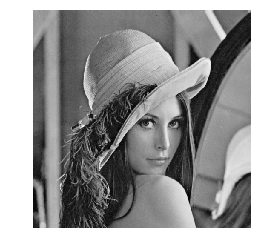

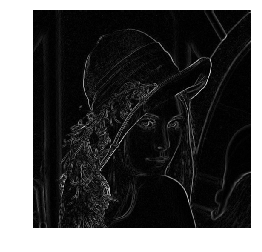

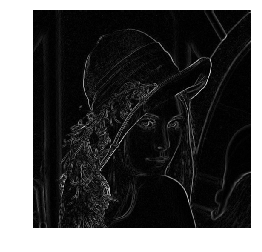

In [199]:
# load the image
img = io.imread('lena_gray.jpg')    

# convert the image to grayscale (1 channel)
img = color.rgb2gray(img)       

#plot the actual image
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

# define the sobel filters
sobelfilter_X = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)
sobelfilter_Y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype = np.float)

#convolve the image with the sobel filters to create filtered image
gx = convolve2d(img,sobelfilter_X,3)
gy = convolve2d(img,sobelfilter_Y,3)
filtered_img = np.sqrt(gx * gx + gy * gy)
filtered_img *= 255.0 / np.max(filtered_img)
# plot the 2d filtered image
plt.imshow(filtered_img, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

#convolve 1d
gx1d = convolve1d(img, np.array([-1,0,1]), np.array([1,2,1]),3)
gy1d = convolve1d(img, np.array([1,2,1]), np.array([-1,0,1]),3)
filtered_img1d = np.sqrt(gx1d * gx1d + gy1d * gy1d)
filtered_img1d *= 255.0 / np.max(filtered_img1d)
# plot the 1d filtered image
plt.imshow(filtered_img1d, cmap=plt.cm.gray)
plt.axis('off')
plt.show()


In [221]:
# define the 99 * 99 filters
import time

filter_y99 = np.array([[1 for i in range(99)] for j in range(99)], dtype = np.float)
filter_x99 =  np.array([[1 for i in range(99)] for j in range(99)], dtype = np.float)
start = time.time()
gx = convolve2d(img,filter_x99,99)
gy = convolve2d(img,filter_y99,99)

end = time.time()
print "Time for 2d Convolution with 99 * 99 filter: " ,(end - start), " seconds"




#convolve 1d
start = time.time()
gx1d = convolve1d(img, np.array([1 for i in range(99)]), np.array([1 for i in range(99)]),99)
gy1d = convolve1d(img, np.array([1 for i in range(99)]), np.array([1 for i in range(99)]),99)
end = time.time()
print "Time for 1d Convolution with 99L filter: " ,(end - start), " seconds"


Time for 2d Convolution with 99 * 99 filter:  12.7359998226  seconds
Time for 1d Convolution with 99L filter:  8.81399989128  seconds


#### Given an M x N image, P x Q filter

1. The computational complexity of 2d convolution: M x N x P x Q
2. The computational complexity of 1d convolution: M x N x P + Q   

# Histogram Equalization

In [121]:
def createHistogram(image):
    histogram = np.zeros((256,), dtype=int)           
    for x in range(image.shape[1]):     # loop over every pixel of the image
        for y in range(image.shape[0]):
            pixelValue = image[x][y]
            histogram[pixelValue] = histogram[pixelValue] + 1       
    return histogram

In [123]:
def createCummulativeHistogram(histogram):
    cummulativehistogram = np.zeros((256,), dtype=int)                 
    for x in range(1, 256):     # loop over every element of the histogram
           cummulativehistogram[x] = cummulativehistogram[x-1] + histogram[x]   
    return cummulativehistogram

In [170]:
def createCorrectedCummulativeHistogram(cummulativehistogram,imageSize):
    correctedcummulativehistogram = np.zeros((256,), dtype=int)                 
    for x in range(1, 256):     # loop over every element of the histogram
        value = float(cummulativehistogram[x])
        correctedValue =  math.ceil (float(((256/float(imageSize))*value)))
        #print value, correctedValue
        correctedcummulativehistogram[x] = correctedValue  
    return correctedcummulativehistogram

In [175]:
def rescanImage(image,correctedcummulativehistogram):
    correctedImage =  np.zeros_like(image)
    for x in range(image.shape[1]):     # loop over every pixel of the image
        for y in range(image.shape[0]):
            correctedImage[x][y] = correctedcummulativehistogram[int(image[x][y])]
    return correctedImage
    
    

In [176]:
# load the image
image = cv2.imread('lena_gray.jpg',0)    

histogram = createHistogram(image)

cummulativehistogram = createCummulativeHistogram(histogram)

correctedcummulativehistogram = createCorrectedCummulativeHistogram(cummulativehistogram,image.shape[0]*image.shape[1])

correctedImage = rescanImage(image,correctedcummulativehistogram)

Text(0.5,1,'Histogram')

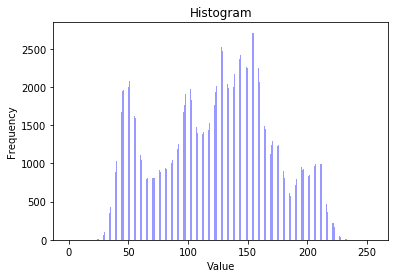

In [147]:
fig, ax = plt.subplots()


bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(range(0,256), histogram, bar_width,
                alpha=opacity, color='b')

ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Histogram')


Text(0.5,1,'Cummulative Histogram')

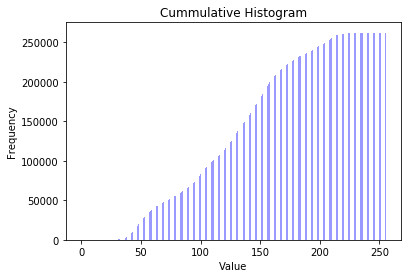

In [148]:
fig, ax = plt.subplots()


bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(range(0,256), cummulativehistogram, bar_width,
                alpha=opacity, color='b')

ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Cummulative Histogram')

Text(0.5,1,'Corrected Cummulative Histogram')

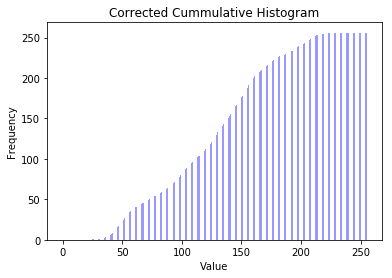

In [173]:
fig, ax = plt.subplots()


bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(range(0,256), correctedcummulativehistogram, bar_width,
                alpha=opacity, color='b')

ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Corrected Cummulative Histogram')

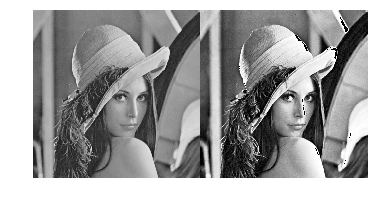

In [186]:
res = np.hstack((image,correctedImage)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res, cmap=plt.cm.gray)
plt.axis('off')
plt.show()